In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0305"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 1.59 s, sys: 330 ms, total: 1.92 s
Wall time: 22.8 s


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,0.022377,0.0,0.111342,0.0,-0.003584,0.0,-0.015458,0.0,-0.005285,...,0.001227,0.022794,0.0,-0.009001,0.0,0.000110,0.0,-0.004812,0.0,-0.002890
1,0.0,0.040042,0.0,0.125553,0.0,-0.003096,0.0,-0.011442,0.0,0.000485,...,0.000000,0.018921,0.0,-0.004415,0.0,0.000547,0.0,0.000067,0.0,0.002000
2,0.0,0.061551,0.0,0.140317,0.0,-0.004850,0.0,-0.009881,0.0,-0.001483,...,0.000000,0.017992,0.0,-0.007550,0.0,-0.006405,0.0,-0.003053,0.0,-0.002898
3,0.0,0.017736,0.0,0.095010,0.0,-0.003239,0.0,-0.003062,0.0,0.002408,...,0.000000,0.003142,0.0,0.001871,0.0,0.006522,0.0,0.002938,0.0,0.000630
4,0.0,0.027167,0.0,0.099828,0.0,-0.000568,0.0,-0.004652,0.0,-0.001031,...,0.000000,-0.000648,0.0,-0.001749,0.0,0.003234,0.0,-0.000545,0.0,0.002186


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.051862,0.001227,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,2.054415e-08,0.000658,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.004724,0.008987,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017631,0.004754,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.053230,0.001228,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.054415e-08,0.000659,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.004735,9.027359e-03,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.017787,0.004765,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.110501,0.853825,4.700175e-07,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000337,0.000337,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    46.000000
1    35.000000
2    37.000000
3    30.000651
4    35.001190
5    28.999994
6    20.000018
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.022377,0.111342,-0.003584,-0.015458,-0.005285,-0.042351,0.048726,-0.010356,-0.015625,-0.009148,...,-0.002573,0.019844,0.035085,0.005781,0.059170,0.022794,-0.009001,0.000110,-0.004812,-0.002890
1,0.040042,0.125553,-0.003096,-0.011442,0.000485,-0.015819,0.079428,-0.007361,-0.012169,-0.005436,...,-0.004346,0.011584,0.048174,0.008333,0.070808,0.018921,-0.004415,0.000547,0.000067,0.002000
2,0.061551,0.140317,-0.004850,-0.009881,-0.001483,-0.001324,0.117396,-0.009356,-0.005519,-0.004402,...,-0.003887,0.017621,0.057804,0.006897,0.081901,0.017992,-0.007550,-0.006405,-0.003053,-0.002898
3,0.017736,0.095010,-0.003239,-0.003062,0.002408,0.007450,0.086876,-0.004402,0.011643,-0.000367,...,0.003483,0.000495,0.048335,0.005704,0.027361,0.003142,0.001871,0.006522,0.002938,0.000630
4,0.027167,0.099828,-0.000568,-0.004652,-0.001031,-0.003376,0.093934,-0.002295,-0.005365,-0.002804,...,0.003721,0.002135,0.052189,0.003754,-0.000598,-0.000648,-0.001749,0.003234,-0.000545,0.002186


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.022629,0.117777,-0.003577,-0.015339,-0.005271,-0.041466,0.049932,-0.010303,-0.015504,-0.009106,...,-0.002569,0.020042,0.035708,0.005798,0.060955,0.023055,-0.008961,0.000110,-0.004800,-0.002886
1,0.040854,0.133776,-0.003091,-0.011376,0.000485,-0.015694,0.082668,-0.007334,-0.012095,-0.005421,...,-0.004337,0.011652,0.049353,0.008368,0.073375,0.019101,-0.004405,0.000547,0.000067,0.002002
2,0.063485,0.150639,-0.004838,-0.009833,-0.001482,-0.001323,0.124565,-0.009312,-0.005504,-0.004393,...,-0.003880,0.017777,0.059507,0.006921,0.085348,0.018155,-0.007521,-0.006385,-0.003049,-0.002893
3,0.017894,0.099670,-0.003234,-0.003057,0.002411,0.007478,0.090762,-0.004392,0.011711,-0.000367,...,0.003489,0.000495,0.049522,0.005720,0.027739,0.003147,0.001873,0.006543,0.002942,0.000630
4,0.027540,0.104981,-0.000568,-0.004642,-0.001030,-0.003371,0.098487,-0.002293,-0.005350,-0.002800,...,0.003728,0.002138,0.053575,0.003761,-0.000598,-0.000647,-0.001747,0.003239,-0.000545,0.002188
5,0.049867,0.134163,-0.002466,0.000847,-0.000377,0.011914,0.104423,0.000462,0.007250,0.001217,...,0.000864,0.008498,0.055894,0.006470,0.029461,0.009542,0.005046,0.004890,0.002907,0.005947
6,0.029646,0.120482,-0.001777,0.003941,-0.001422,0.008031,0.129039,0.003203,-0.001801,-0.000288,...,-0.000271,0.009249,0.050754,0.005770,0.024775,0.010563,0.003422,0.001206,0.000856,0.002143


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.022629,0.117777,0.0,0.0,0.000000,0.000000,0.049932,0.0,0.000000,0.0,...,0.000000,0.020042,0.035708,0.005798,0.060955,0.023055,0.000000,0.000110,0.000000,0.000000
1,0.040854,0.133776,0.0,0.0,0.000485,0.000000,0.082668,0.0,0.000000,0.0,...,0.000000,0.011652,0.049353,0.008368,0.073375,0.019101,0.000000,0.000547,0.000067,0.002002
2,0.063485,0.150639,0.0,0.0,0.000000,0.000000,0.124565,0.0,0.000000,0.0,...,0.000000,0.017777,0.059507,0.006921,0.085348,0.018155,0.000000,0.000000,0.000000,0.000000
3,0.017894,0.099670,0.0,0.0,0.002411,0.007478,0.090762,0.0,0.011711,0.0,...,0.003489,0.000495,0.049522,0.005720,0.027739,0.003147,0.001873,0.006543,0.002942,0.000630
4,0.027540,0.104981,0.0,0.0,0.000000,0.000000,0.098487,0.0,0.000000,0.0,...,0.003728,0.002138,0.053575,0.003761,0.000000,0.000000,0.000000,0.003239,0.000000,0.002188


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    26.718926
1    28.275555
2    30.813805
3    25.152693
4    23.212625
5    29.180186
6    27.849117
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,46.000000,26.718926
1,35.000000,28.275555
2,37.000000,30.813805
3,30.000651,25.152693
4,35.001190,23.212625
5,28.999994,29.180186
6,20.000018,27.849117


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

9.85147380785539

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

8.122503965828605

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.06498654274241045, pvalue=0.889908235070455)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-0.7561028664517258

##### Coverages and widths for the forecasted values?

In [42]:
# Should we get the interval preds in the same thinking way too?

In [43]:
# maybe we should - so first convert to data scale before avearging, and see if the measures differ a lot

In [44]:
# for this we need the all_forecasts npy files

In [45]:
# content location is the same path as above

In [46]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [47]:
# all_forecasts_npy_files

In [48]:
# load the npy files

In [49]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 856 ms, sys: 516 ms, total: 1.37 s
Wall time: 19.8 s


In [50]:
len(loaded_npy_files)

910

In [51]:
loaded_npy_files[0].shape

(1000, 7)

In [52]:
loaded_npy_files[0]

array([[ 0.03243577,  0.02564561,  0.17621529, ..., -0.00962448,
         0.10803008,  0.02618682],
       [-0.00560647, -0.11560047, -0.06393147, ...,  0.01154518,
         0.04079854,  0.01973271],
       [ 0.00025105,  0.12381065,  0.03084064, ...,  0.07478344,
        -0.04000747,  0.05453575],
       ...,
       [ 0.09717298,  0.01331568,  0.13177133, ...,  0.10315907,
         0.09119439,  0.08018959],
       [-0.20280188, -0.08756191, -0.03557825, ...,  0.15995514,
         0.15359616,  0.02171361],
       [-0.05132073,  0.05662143,  0.04738522, ...,  0.07831979,
        -0.04553998,  0.01742315]], dtype=float32)

In [53]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 24.7 ms, sys: 835 µs, total: 25.6 ms
Wall time: 24.6 ms


In [54]:
loaded_npy_files[0]

array([[0.03243577, 0.02564561, 0.17621529, ..., 0.        , 0.10803008,
        0.02618682],
       [0.        , 0.        , 0.        , ..., 0.01154518, 0.04079854,
        0.01973271],
       [0.00025105, 0.12381065, 0.03084064, ..., 0.07478344, 0.        ,
        0.05453575],
       ...,
       [0.09717298, 0.01331568, 0.13177133, ..., 0.10315907, 0.09119439,
        0.08018959],
       [0.        , 0.        , 0.        , ..., 0.15995514, 0.15359616,
        0.02171361],
       [0.        , 0.05662143, 0.04738522, ..., 0.07831979, 0.        ,
        0.01742315]], dtype=float32)

In [55]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [56]:
output.shape

(1000, 7)

In [57]:
output

array([[35.658997, 34.705727, 38.169353, ..., 32.060146, 35.77192 ,
        35.433987],
       [32.25731 , 31.83317 , 34.75501 , ..., 31.095993, 37.789967,
        41.196617],
       [41.167717, 34.97648 , 38.79303 , ..., 38.741302, 46.585396,
        42.2242  ],
       ...,
       [35.955704, 36.692837, 38.810375, ..., 38.930668, 44.835453,
        50.843716],
       [34.069008, 31.839312, 41.94303 , ..., 40.23046 , 39.70108 ,
        37.64736 ],
       [32.497765, 38.548805, 41.64372 , ..., 37.28365 , 43.163605,
        42.34832 ]], dtype=float32)

In [58]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [59]:
output_alt.shape

(1000, 7)

In [60]:
output_alt

array([[35.658997, 34.705727, 38.169353, ..., 32.060146, 35.77192 ,
        35.433987],
       [32.25731 , 31.83317 , 34.75501 , ..., 31.095993, 37.789967,
        41.196617],
       [41.167717, 34.97648 , 38.79303 , ..., 38.741302, 46.585396,
        42.2242  ],
       ...,
       [35.955704, 36.692837, 38.810375, ..., 38.930668, 44.835453,
        50.843716],
       [34.069008, 31.839312, 41.94303 , ..., 40.23046 , 39.70108 ,
        37.64736 ],
       [32.497765, 38.548805, 41.64372 , ..., 37.28365 , 43.163605,
        42.34832 ]], dtype=float32)

In [61]:
np.mean(output_alt == output)

1.0

In [62]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [63]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [64]:
li_train

array([[24.77422462],
       [24.12009773],
       [25.03096209],
       [22.16408   ],
       [21.25888152],
       [24.94836593],
       [24.96951656]])

In [65]:
ui_train

array([[43.19900665],
       [44.95613756],
       [48.1515893 ],
       [45.78649139],
       [43.91576166],
       [49.77379589],
       [48.95420818]])

In [66]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [67]:
avg_width_train

22.495837456839418

In [68]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.7142857142857143

In [71]:
np.mean(output, axis = 0)

array([33.186283, 33.941063, 36.157364, 33.29761 , 31.143066, 36.131493,
       35.864628], dtype=float32)

In [72]:
# sum_forecasted_values

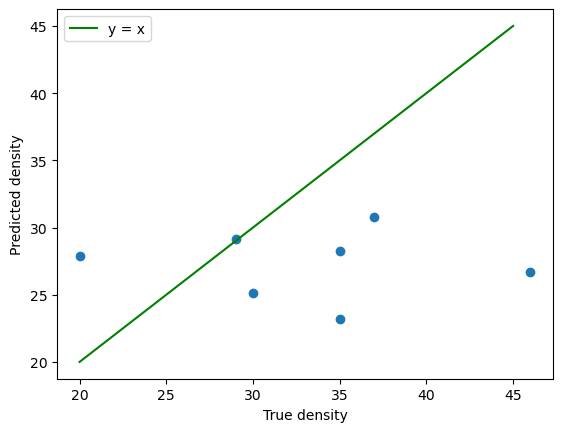

In [76]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 45], [20, 45], color='green', label='y = x')
plt.legend()
plt.show()

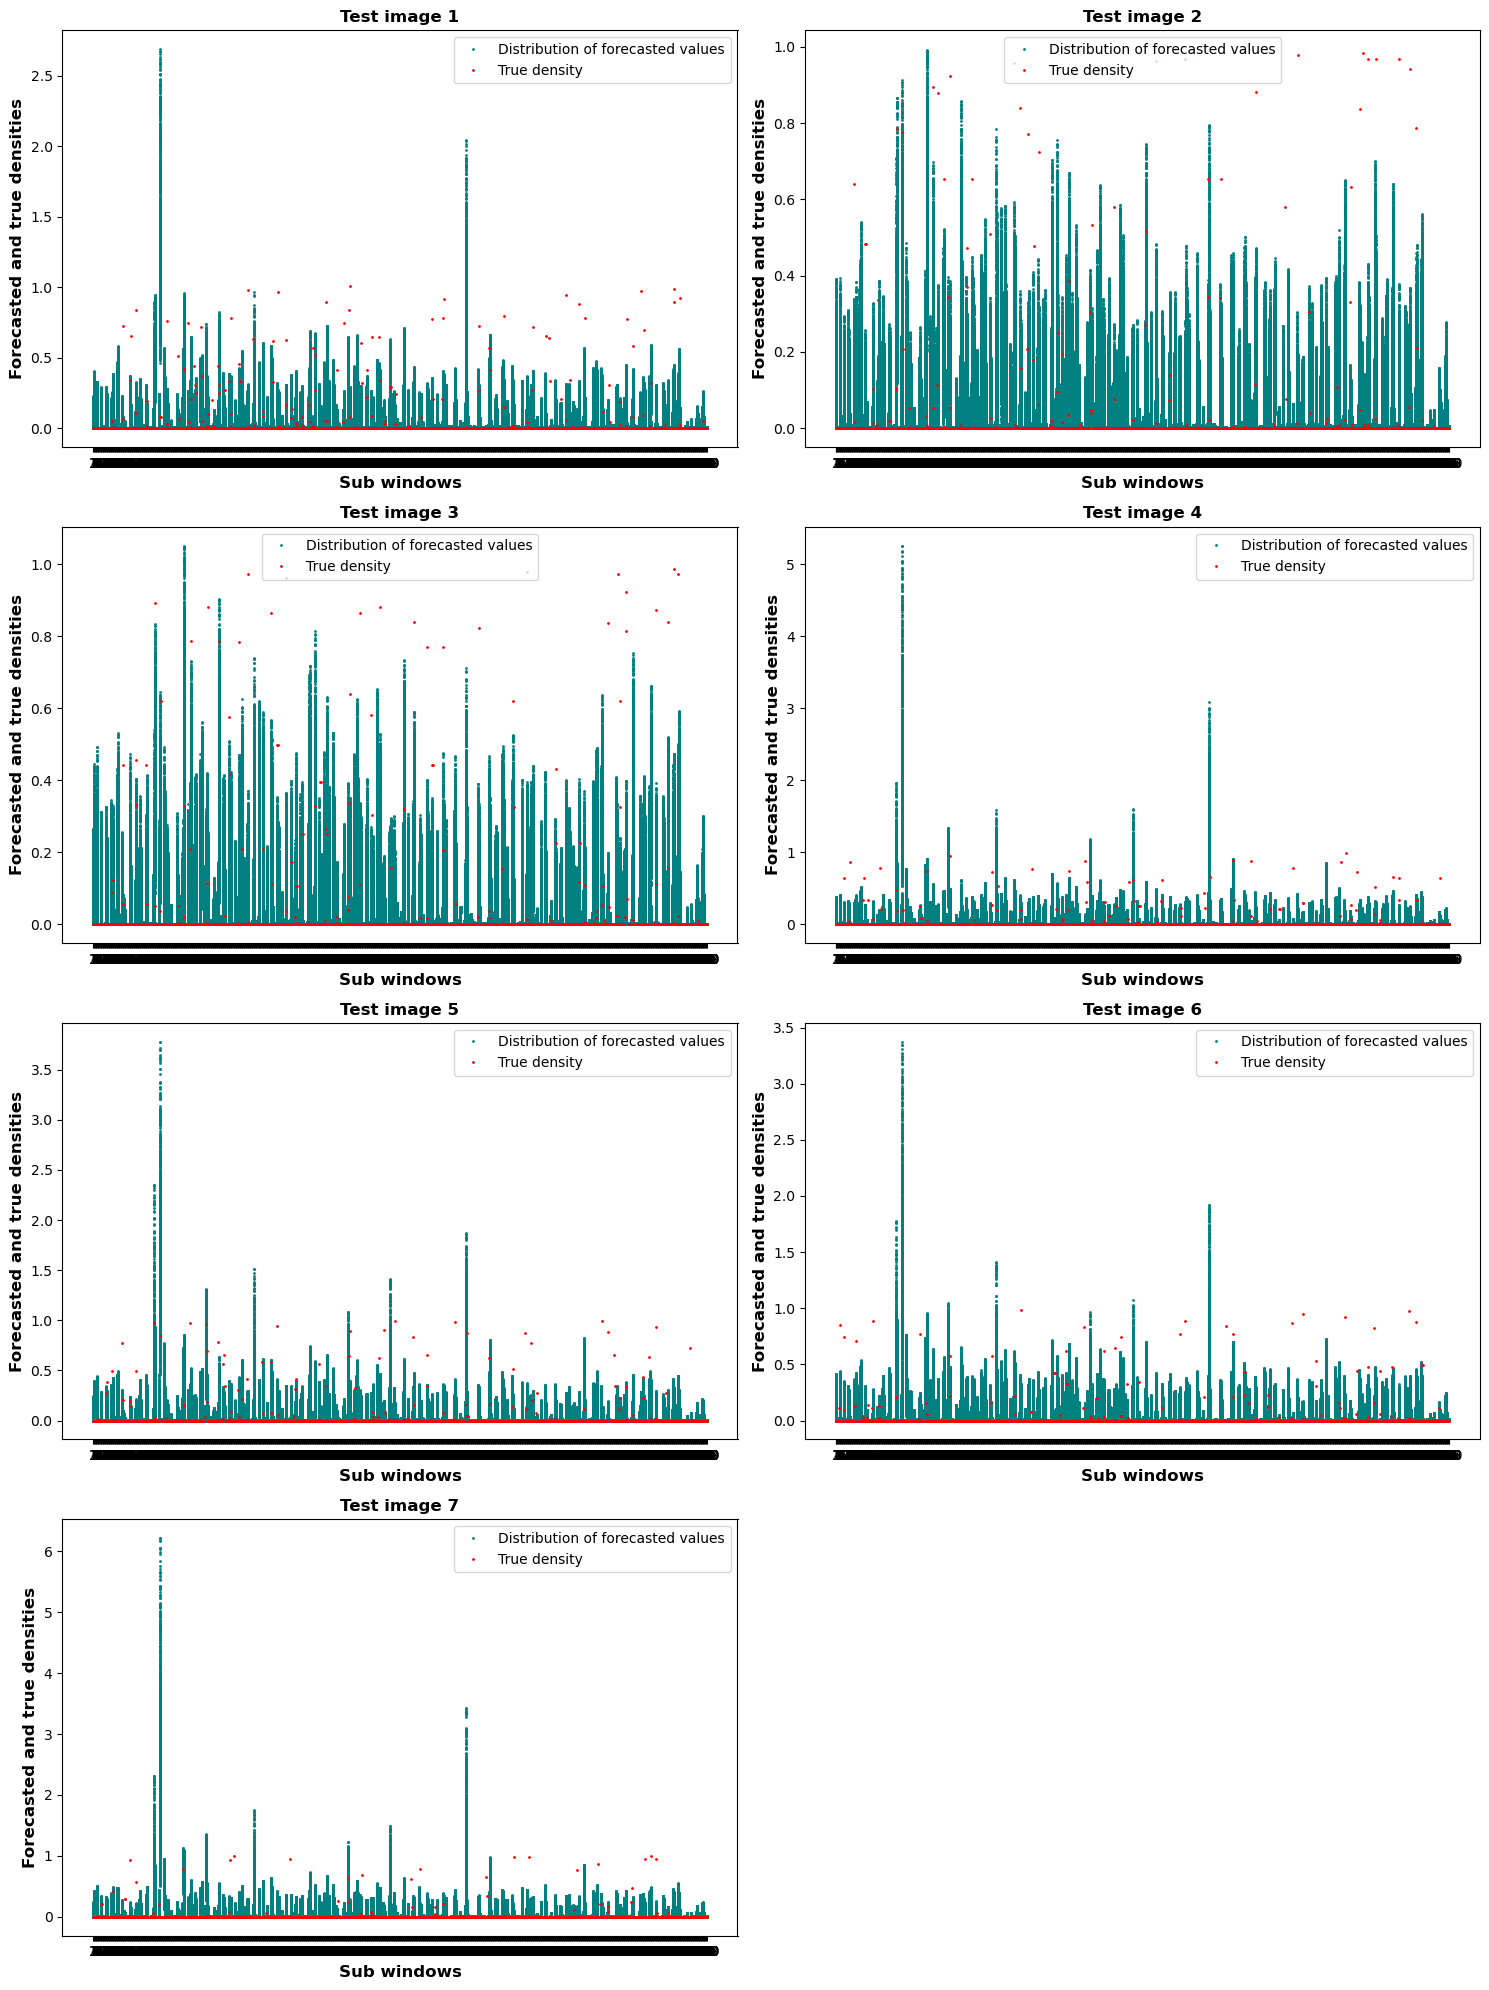

CPU times: user 33.2 s, sys: 803 ms, total: 34 s
Wall time: 33.6 s


In [74]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [75]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots